# "APPENDIX"

In this notebook you'll find some additional techniques that I tried in order to improve my prediction results for mainly multiclass classification part. 

## Import necessary packages and prepare dataset 

In [1]:
#### IMPORT PACKAGES ####

# basic packages
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter

# preprocessing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

# model
from sklearn.linear_model import LogisticRegression

# resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek 
import imblearn


# model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# set working dir
os.chdir("/Users/pazma/Documents/BSE/cml/")

# import my functions that I created for this project from my_functions.ipynb
# from ipynb.fs.full.linclass_my_functions import *  
%run linclass_my_functions.ipynb 

# import the helper_utils function
# (Jack's pre-prepared functions)
import sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(1, parentdir)
from helper_functions import *

In [2]:
# Read data
raw_train=pd.read_csv("forest-cover-classification/MultiClass_Train.csv")
raw_test=pd.read_csv("forest-cover-classification/MultiClass_Test.csv")

In [3]:
raw_test.shape, raw_train.shape

((13073, 13), (61006, 14))

In [4]:
# Recreate dummies for train and test data without Cover Type dummies 
train_data=get_dummies(raw_train, ["Wilderness_Area", "Soil_Type"]) 
test_data=get_dummies(raw_test, ["Wilderness_Area", "Soil_Type"])



In [5]:
# Use the square of Elevation variable
# Add interaction terms of Elevation (Elevation and Elevation squared) with Soil Type
train_v2=train_data.copy()
train_v2["Elevation_sq"]=train_v2["Elevation"]**2

soil_type_columns=[x for x in list(train_data.columns) if x.startswith("Soil_Type")]

# Interact them
for c in soil_type_columns:
    train_v2["Elevation_"+c]=train_v2["Elevation"]*train_v2[c]
    train_v2["Elevation_sq_"+c]=train_v2["Elevation_sq"]*train_v2[c]

# do the same for the test data
test_data_2=test_data.drop(columns="Index")
test_data_2["Elevation_sq"]=test_data_2["Elevation"]**2

for c in soil_type_columns:
    test_data_2["Elevation_"+c]=test_data_2["Elevation"]*test_data_2[c]
    test_data_2["Elevation_sq_"+c]=test_data_2["Elevation_sq"]*test_data_2[c]




In [6]:
# remove Index column 
train_v2=train_v2.drop(columns="Index")
X_test=test_data_2.values

In [7]:
# create X_train, y, X_test
X_multi=train_v2.drop(columns="Cover_Type")
y_multi=train_v2.Cover_Type
X_test_multi=test_data_2

In [8]:
# rescale 
scaler_multi = MinMaxScaler(feature_range = (0,1))

scaler_multi.fit(X_multi)
X_multi_scaled = scaler_multi.transform(X_multi)

X_test_multi_scaled = scaler_multi.transform(X_test_multi)

## Resample with SMOTE and SMOTETomek, fit and predict a LogReg model and evaluate results

In [19]:

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

model=LogisticRegression(multi_class='multinomial', 
                        penalty="l2", C=100, solver='lbfgs')

# SMOTE
print("SMOTE \n")
smote = SMOTE(random_state=42)
X_smote_multi, y_smote_multi = smote.fit_resample(X_multi_scaled, y_multi)
smote_model=predict_evaluate_multiclass(X_smote_multi, y_smote_multi, model )

# SMOTETomek
print("SMOTETomek \n")
smotetomek = SMOTETomek(random_state=42)
X_smtl_multi, y_smtl_multi = smotetomek.fit_resample(X_multi_scaled, y_multi)
smotetomek_model=predict_evaluate_multiclass(X_smtl_multi, y_smtl_multi, model )


SMOTE 



/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean accuracy result of in-sample cross-validation: 0.7131710211871883


              precision    recall  f1-score   support

           1       0.66      0.66      0.66     29690
           2       0.63      0.51      0.56     29690
           3       0.61      0.62      0.62     29690
           4       0.82      0.89      0.85     29690
           5       0.72      0.80      0.76     29690
           6       0.64      0.60      0.62     29690
           7       0.87      0.89      0.88     29690

    accuracy                           0.71    207830
   macro avg       0.71      0.71      0.71    207830
weighted avg       0.71      0.71      0.71    207830

SMOTETomek 



/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Mean accuracy result of in-sample cross-validation: 0.7149639527734813


              precision    recall  f1-score   support

           1       0.66      0.68      0.67     29009
           2       0.65      0.50      0.57     28998
           3       0.62      0.60      0.61     29677
           4       0.82      0.89      0.86     29690
           5       0.72      0.82      0.77     29678
           6       0.63      0.63      0.63     29680
           7       0.87      0.88      0.88     29684

    accuracy                           0.72    206416
   macro avg       0.71      0.72      0.71    206416
weighted avg       0.71      0.72      0.71    206416



## Assign individual weights to different classes

In [20]:
# assign individual weights
weights = {1:1.0,  2:2.0, 3:2.0, 4:2.0, 5:2.0, 6:2.0, 7:2.0}

# define base model
model = LogisticRegression(multi_class='multinomial', class_weight=weights,
                                  penalty="l2", C=100, solver='lbfgs')

# evaluate
weights_model=predict_evaluate_multiclass(X_multi_scaled, y_multi, model )

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean accuracy result of in-sample cross-validation: 0.7002699503709418


              precision    recall  f1-score   support

           1       0.77      0.51      0.61     22199
           2       0.69      0.89      0.78     29690
           3       0.66      0.82      0.73      3802
           4       0.51      0.35      0.41       295
           5       0.26      0.01      0.02       992
           6       0.48      0.24      0.32      1865
           7       0.67      0.67      0.67      2163

    accuracy                           0.70     61006
   macro avg       0.58      0.50      0.51     61006
weighted avg       0.70      0.70      0.68     61006



## Penalize Algorithms (Cost-Sensitive Training)


The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM.

During training, we can use the argument `class_weight='balanced'` to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument `probability=True` if we want to enable probability estimates for SVM algorithms.

Let’s train a model using Penalized-SVM on the original imbalanced dataset:

In [ ]:
#### This part of code, fitting the SVC model takes a very long time to run that is why only the accuracy score is printed out

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_multi_scaled, y_multi)

svc_predict = svc_model.predict(X_multi_scaled)# check performance

print('Accuracy score:',accuracy_score(y_multi, svc_predict))
#print('F1 score:',f1_score(y_multi, svc_predict, average=""))


#predict_evaluate_multiclass(X_multi_scaled, y_multi, svc_model )
#confusion_matrix_()

Accuracy score: 0.6442153230829755


## Change the algorithm: Apply  `DecisionTree()` and `RandomForest()` model 

Decision trees frequently perform well on imbalanced data, especially RandomForest algorithms.

In [9]:
class_labels=[1,2,3,4,5,6,7]

Accuracy score: 0.6777530079008622
Mean accuracy result of in-sample cross-validation: 0.6708738498298971


              precision    recall  f1-score   support

           1       0.65      0.67      0.66     22199
           2       0.71      0.79      0.75     29690
           3       0.67      0.69      0.68      3802
           4       0.00      0.00      0.00       295
           5       0.00      0.00      0.00       992
           6       0.45      0.23      0.30      1865
           7       0.00      0.00      0.00      2163

    accuracy                           0.68     61006
   macro avg       0.35      0.34      0.34     61006
weighted avg       0.63      0.68      0.65     61006



/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


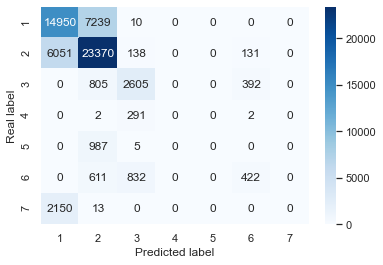

Confusion matrix of in-sample cross-validation:


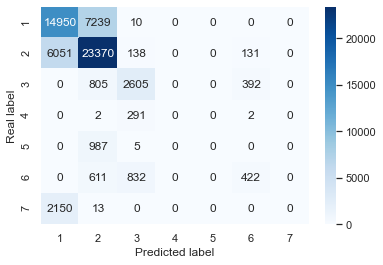

In [10]:
#### DecisionTree ####
# load library
from sklearn.tree import DecisionTreeClassifier

# define model
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)

# fit model
dtc.fit(X_multi_scaled, y_multi)

# predict
dtc_predict = dtc.predict(X_multi_scaled)

# evaluate performance 
print('Accuracy score:',accuracy_score(y_multi, dtc_predict))
predict_evaluate_multiclass(X_multi_scaled, y_multi, dtc )
confusion_matrix_(X_multi_scaled,y_multi, dtc_predict,dtc, class_labels)


Accuracy score: 1.0
Mean accuracy result of in-sample cross-validation: 0.8748811470947822


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22199
           2       1.00      1.00      1.00     29690
           3       1.00      1.00      1.00      3802
           4       1.00      1.00      1.00       295
           5       1.00      1.00      1.00       992
           6       1.00      1.00      1.00      1865
           7       1.00      1.00      1.00      2163

    accuracy                           1.00     61006
   macro avg       1.00      1.00      1.00     61006
weighted avg       1.00      1.00      1.00     61006



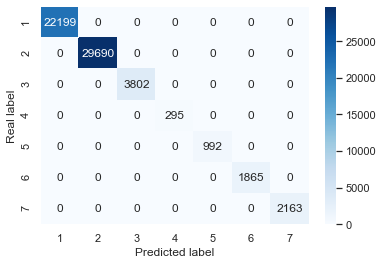

Confusion matrix of in-sample cross-validation:


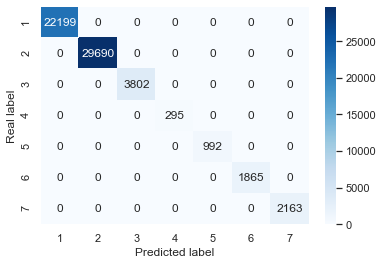

In [11]:
#### RandomForest ####
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_multi_scaled, y_multi)

# predict
rfc_predict = rfc.predict(X_multi_scaled)

# evaluate
print('Accuracy score:',accuracy_score(y_multi, rfc_predict))
#print('F1 score:',f1_score(y_multi, rfc_predict))

predict_evaluate_multiclass(X_multi_scaled, y_multi, rfc )
confusion_matrix_(X_multi_scaled,y_multi, rfc_predict, rfc, class_labels)

As expected, RandomForest perfomed the best. Its Accuracy is 1.0, which I think comes from overfitting the data, but looking at the Accuracy score of the in-sample cross-validation (0.89) we can say, that the model is rather stable and performs well. 

In [20]:
# Produce .csv for kaggle testing 
rfc_hat = rfc.predict(X_test_multi_scaled)
test_predictions_submit = pd.DataFrame({"Index": raw_test["Index"], "Cover_Type": rfc_hat})
test_predictions_submit.to_csv("test_LogReg_predictions_multiclass_submit.csv", index = False)